In [11]:
# IMPORTS 
from networkx import strongly_connected_components as scc
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import pygraphviz as pgv
import networkx as nx
import pandas as pd
import time

## DataScrapper

Esta clase será la encargada de hacer de API para la recogida de los datos de Twitter, usando la librería snscrape. Almacenando los datos y pasa los datos en formato pandas.DataFrame

In [12]:
from datascrapper import DataScrapper

### Examples - DataScrap

        user = sntwitter.TwitterUserScraper('elonmusk')._get_entity()

        query = '@realDonaldTrump @kanyewest -@ladyGaga from:elonmusk until:2023-02-18 since:2012-09-18'
        df = DataScrapper('elonmusk').get_query(query) 
        print(df.head())

        df = DataScrapper('elonmusk').get_mentions_to('realDonaldTrump')
        print(df.head())

        df = DataScrapper('elonmusk').get_outputs() 
        print(df.describe())

        df = DataScrapper('elonmusk').get_inputs() 
        print(df.head())

        df = DataScrapper('elonmusk').get_mentions_to('greg16676935420')
        print(df.head().loc[:,['Date','Tweets']])

        df = DataScrapper('elonmusk').get_mentions_from('greg16676935420')
        print(df.head().loc[:,['Date','Tweets']])

## Tree 

Grafo formado por usuarios y menciones entre ellos: los usuarios son los nodos y las menciones las aristas (falta ponderarlas). La raíz del árbol será simpre el usuario elegido como víctima en primer lugar, se exapanden desde él recursivamente los nodos hijos.

In [13]:
import sys 
from tree import Tree

## GraphManager

Esta clase será la encargada de recibir los parámetros iniciales, crear el grafo y guardarlo. Además tendrá definidas las funciones internas para realizar consultas especificas sobre los datos y actualizar los valores del grafo, por ejemplo limpiar o podar ramas lejanas / innecesarias o añadir aristas o nodos importantes.
Además será la clase encargada de mostrar los resultados e interactuar con el usuario - será como la API

In [14]:
from graphmanager import GraphManager

## Ejemplo: scrappeando a Barack Obama

Construiremos un grafo de relaciones en twitter del expresidente basado en sus respuestas y menciones recientes.

In [15]:
victim = 'barackobama'
last_tweets = 20
depth = 1

In [16]:
manager = GraphManager(victim, last_tweets, depth)
# tree -> invocación por defecto .add_missing_edges()
# pr = nx.pagerank(manager.nx)  

### ARBOL EN BRUTO

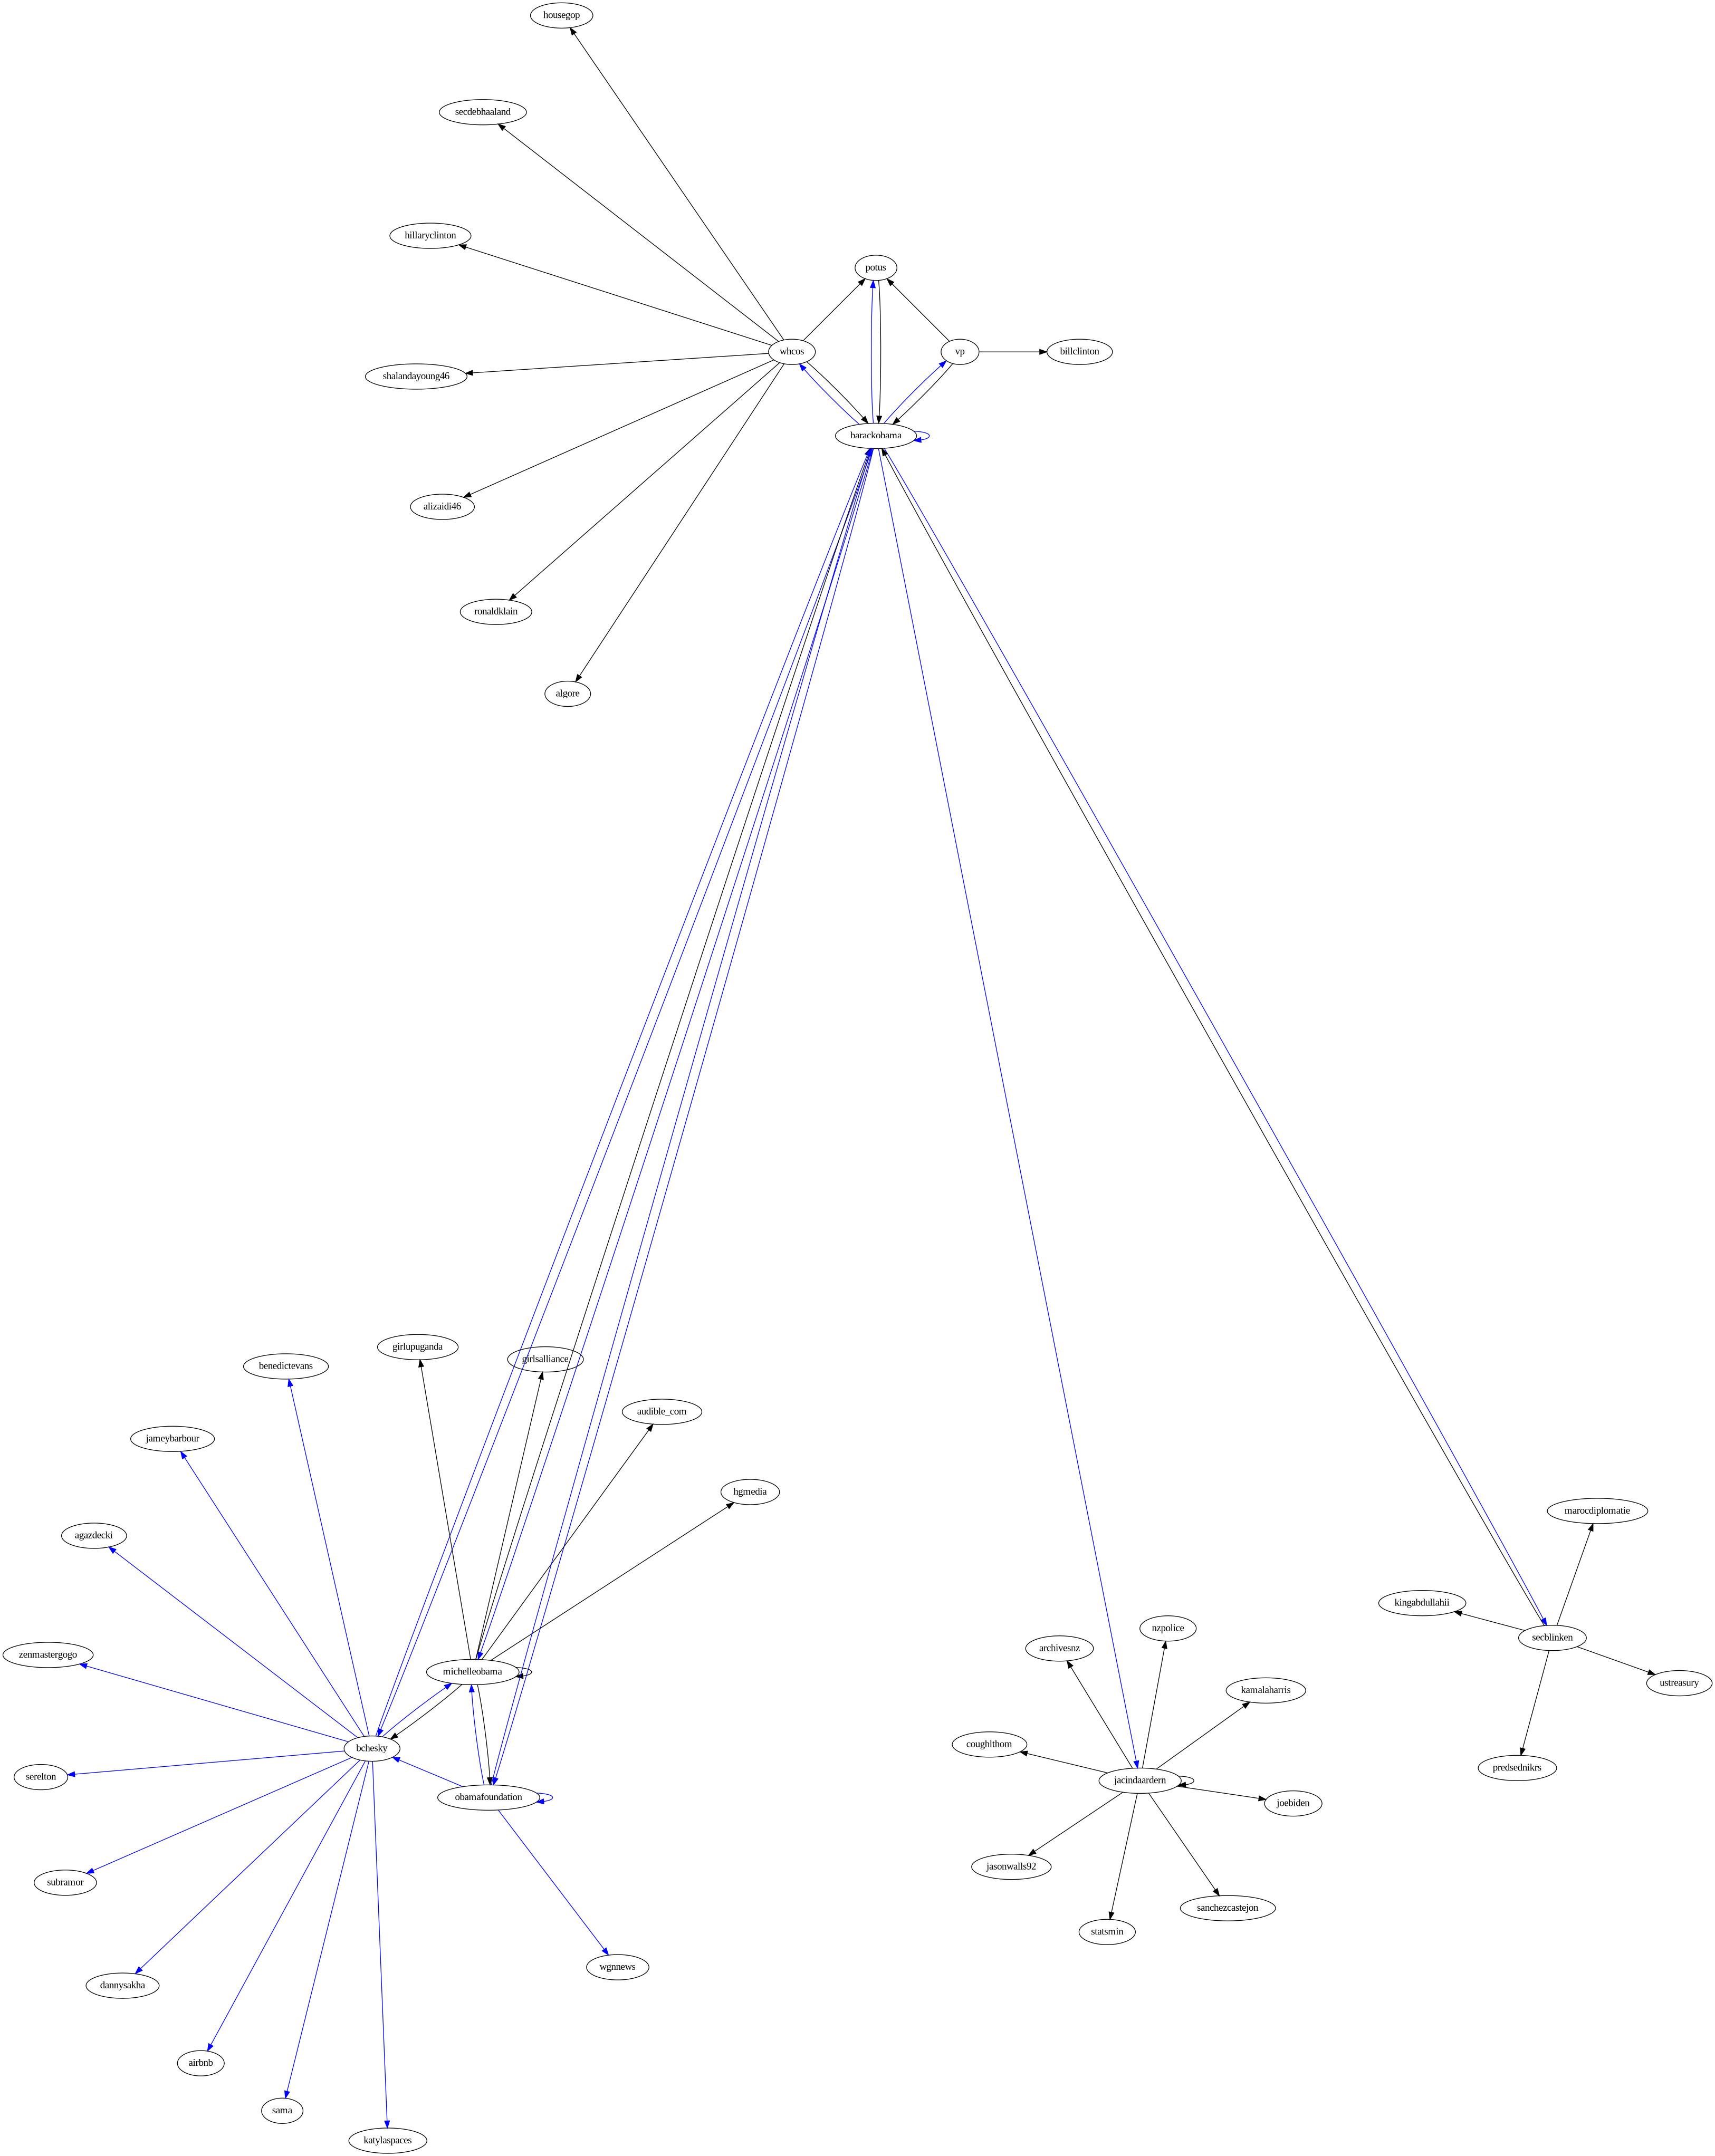

In [17]:
import os 
p = f'/VICTIMS/{manager.victim}'+ manager.path[:-4]+ '.png'
im = Image.open(os.getcwd()+p)
display(im)

### AMISTADES - ARISTAS BIDIRECCIONALES

In [18]:
# mostramos conexiones bidireccionales (pueden ser positivas o negativas)
manager.save_friends()

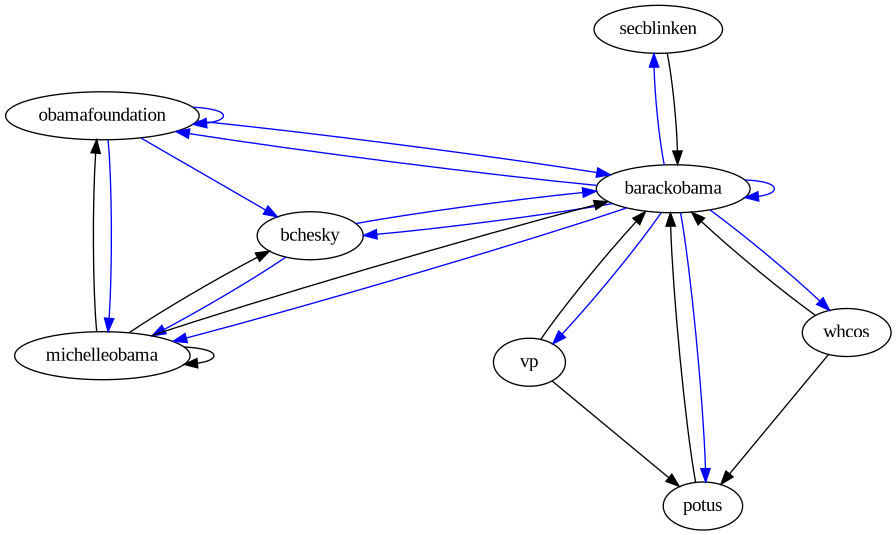

In [19]:
p = f'/VICTIMS/{manager.victim}'+ manager.path[:-4]+ '_amigos.png'
im = Image.open(os.getcwd()+p)
display(im)

## ARBOL COMÚN - SCRAPPEANDO MULTIPLES CUENTAS

VIA LOOP:

In [20]:
victims = ['agarzon','sanchezcastejon','irenemontero','podemos']
F = nx.DiGraph()
for v in victims:
    graph = nx.DiGraph(GraphManager(v, 20, 1).nx)
    print(type(graph))
    F = nx.compose(F, graph)
nx.nx_pydot.write_dot(F, 'tw_left.dot')

<class 'networkx.classes.digraph.DiGraph'>
<class 'networkx.classes.digraph.DiGraph'>
<class 'networkx.classes.digraph.DiGraph'>
<class 'networkx.classes.digraph.DiGraph'>


In [21]:
man = GraphManager('',-1,-1,'tw_left.dot')
man.save_friends()

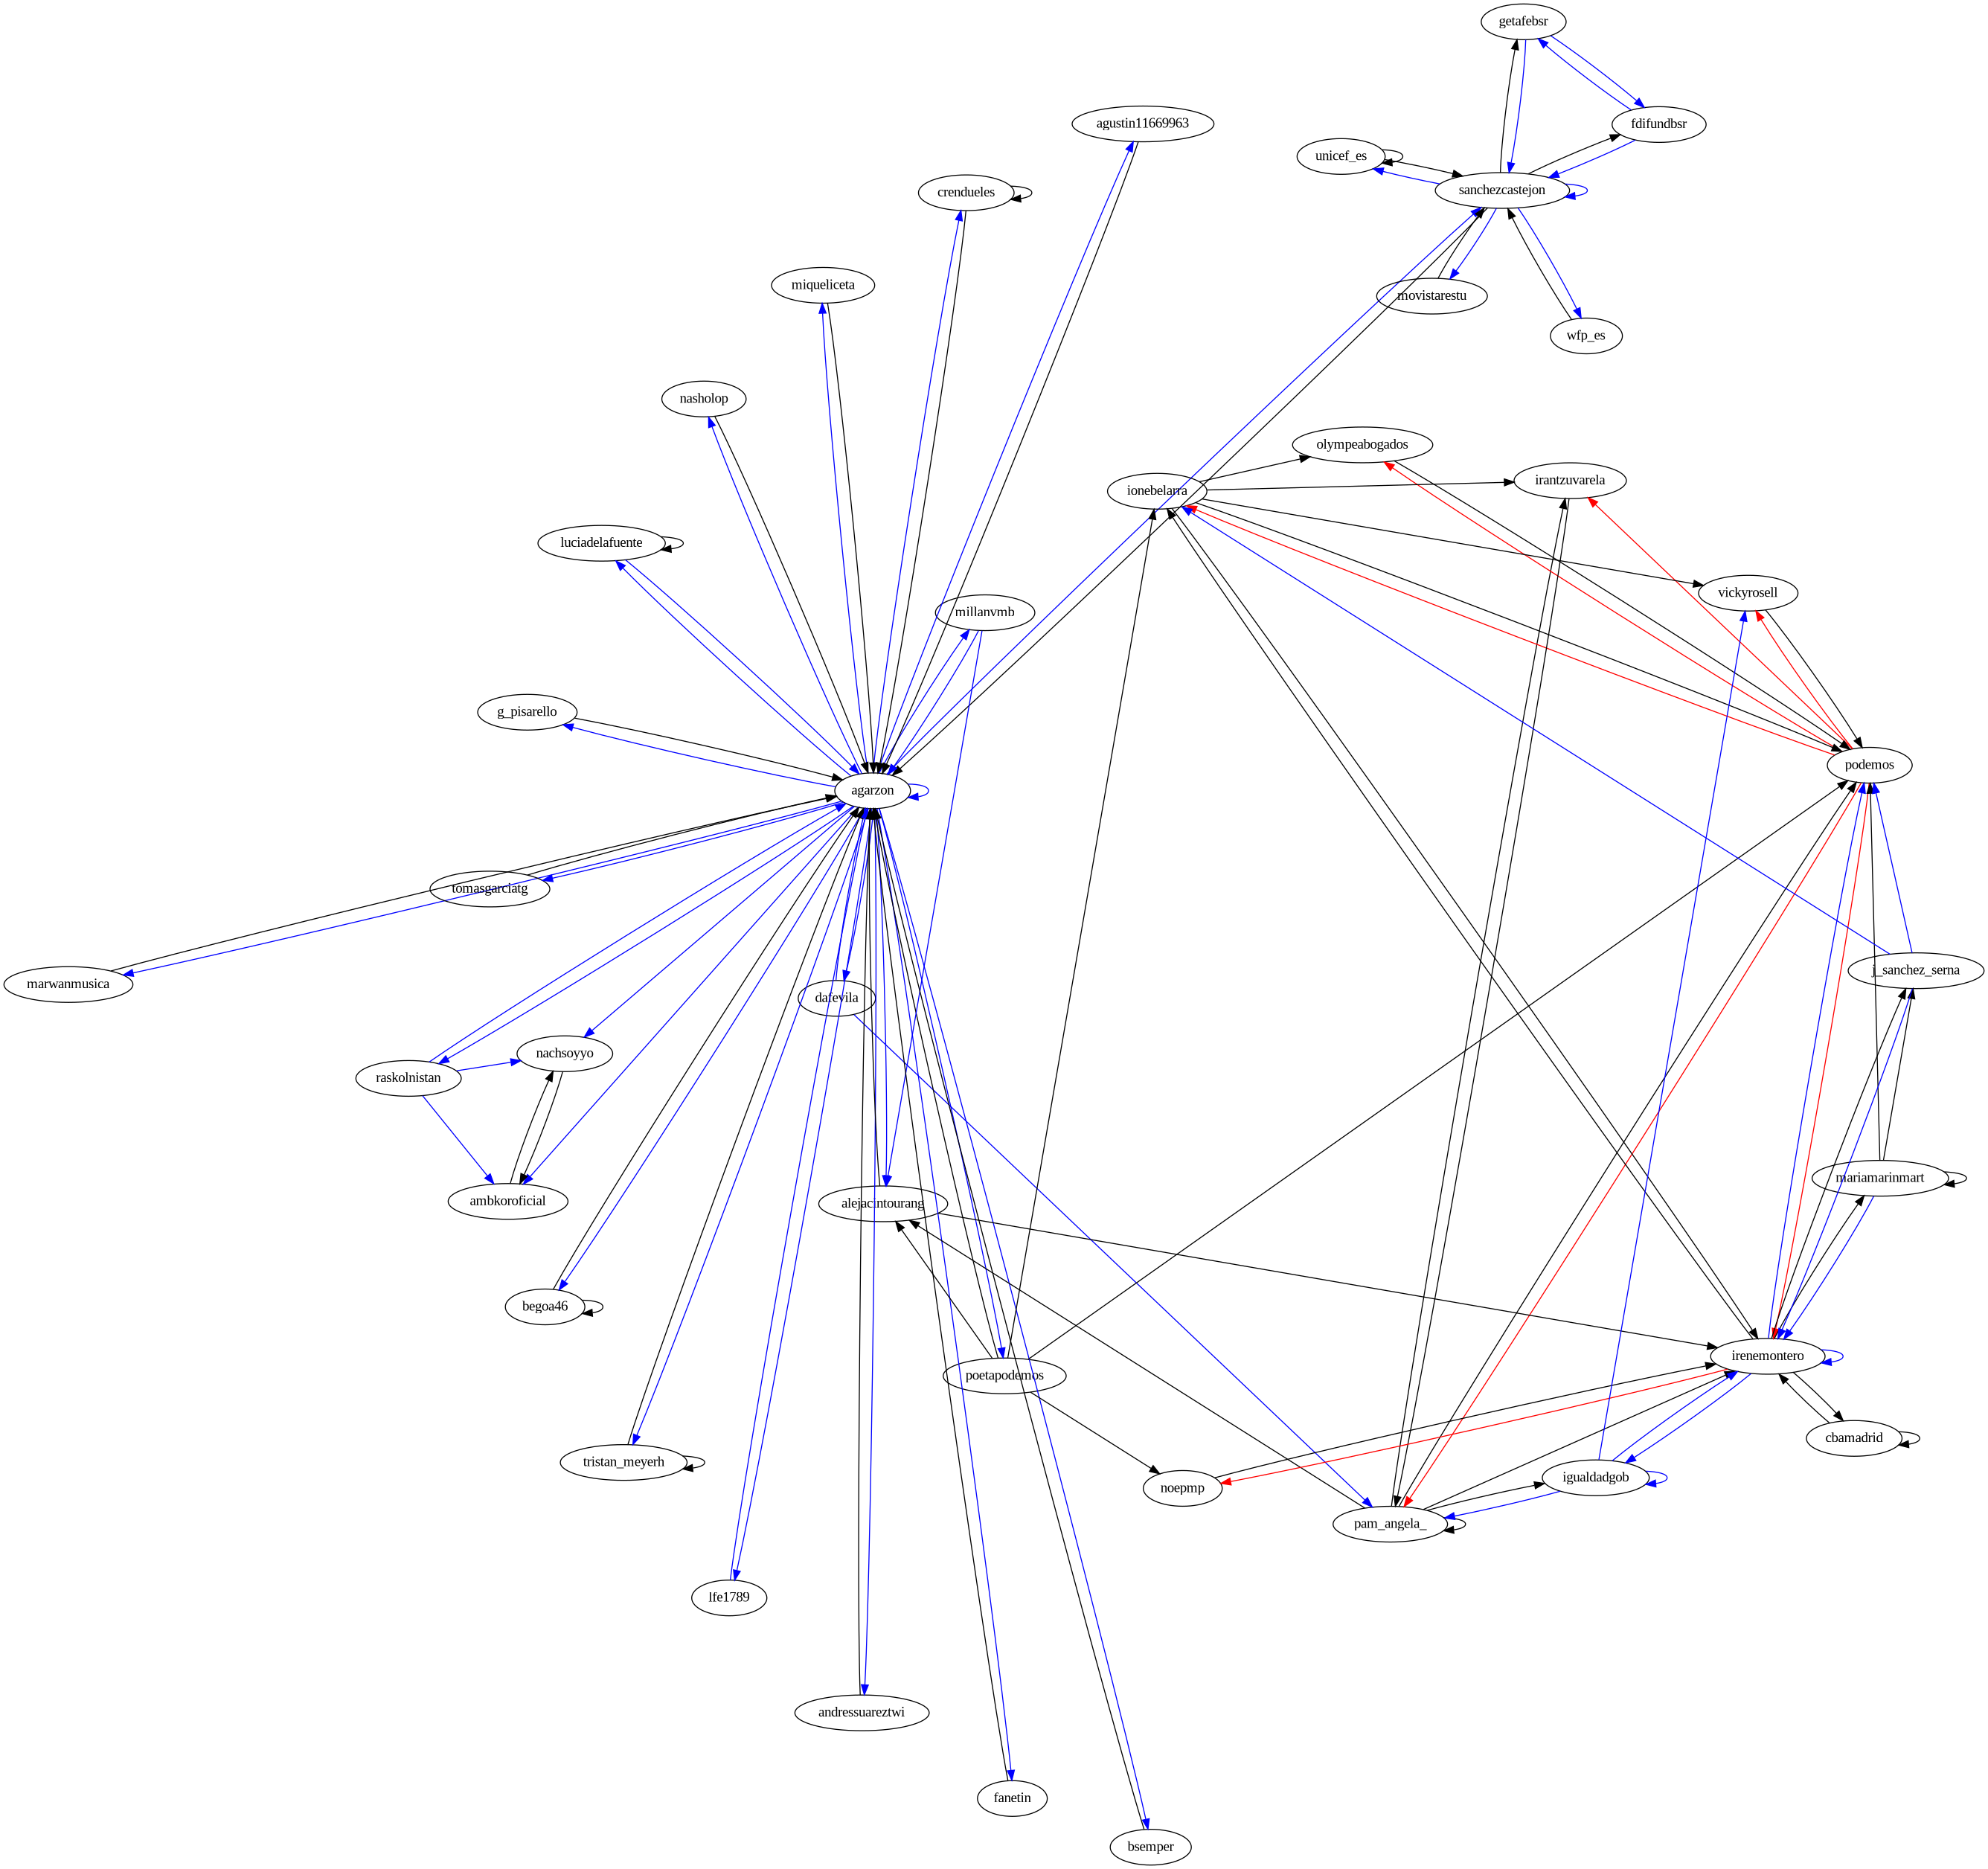

In [22]:
im = Image.open(os.getcwd()+'/tw_left_amigos.png')
display(im)

VIA MULTIGRAPH:

In [23]:
from MultiG import MultiG

victims = ['santi_abascal','macarena_olona','ivanedlm','vox_es']
multig = MultiG(victims,20)
multig.save()
multig.save_friends()

Could not translate t.co card URL on tweet 707619686138167297
/home/jd/.local/lib/python3.10/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: circo: graph is too large for cairo-renderer bitmaps. Scaling by 0.349791 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


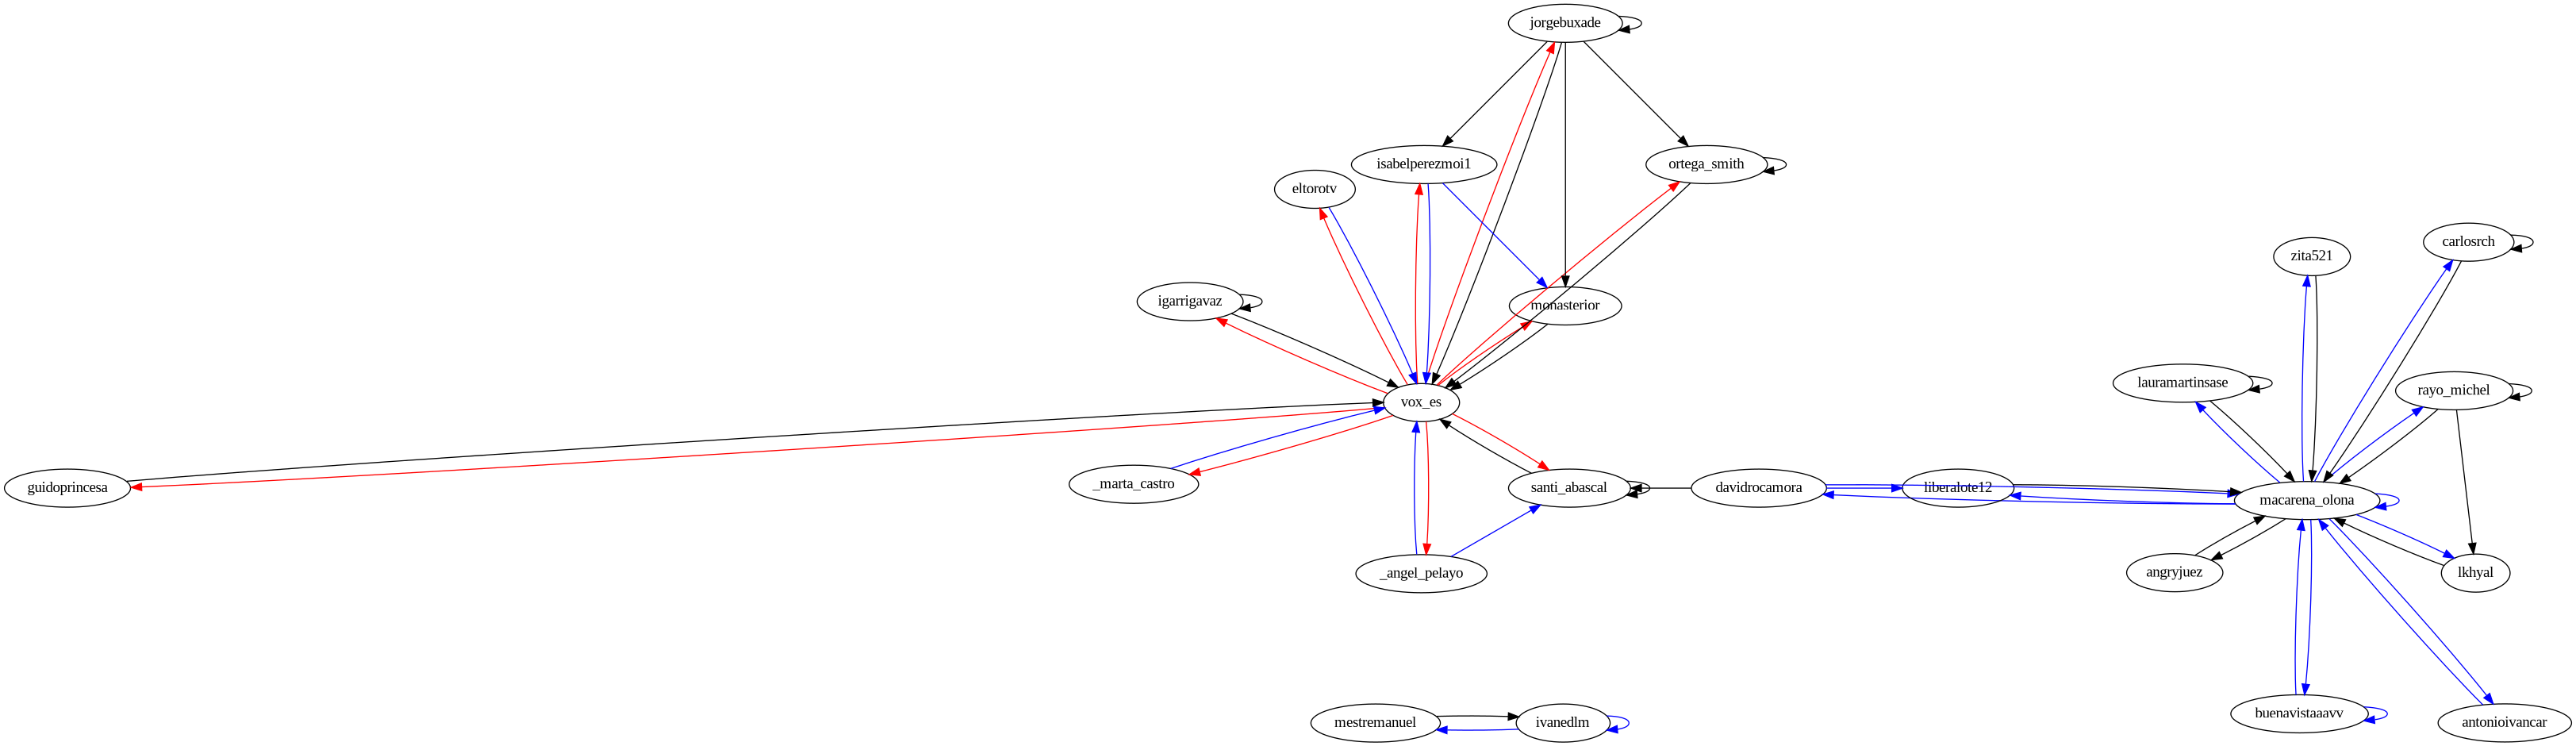

In [24]:
im = Image.open(os.getcwd()+'/smiv_multi_amigos.png')
display(im)